In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# READING THE DATA AND DISPLAY 
df = pd.read_csv("Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# INFORMATION ABOUT THE DATA 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# REPLACING THE BLANK VALUES OF TOTAL CHARGES TO ZERO
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)
df["TotalCharges"] = df["TotalCharges"].astype("float")


In [5]:
# CHECKING FOR NULL VALUES
df.isnull().sum().sum()

np.int64(0)

In [6]:
# CHECKING FOR DESCRIPTION OF DATA
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# CHECKING FOR DUPLICATES
df["customerID"].duplicated().sum()

np.int64(0)

In [8]:
# CHANGING THE BINARY VALUES OF SENIOR CITIZENS TO STRING
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


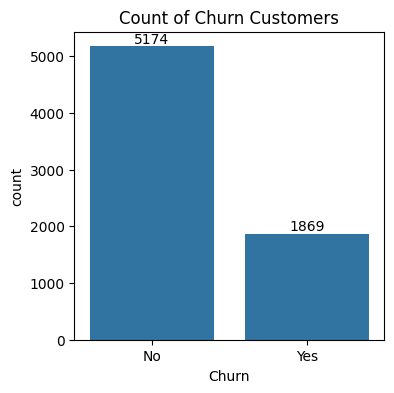

In [10]:
# DISPLAYIG THE COUNT OF CHURN CUSTOMERS
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Churn Customers")
plt.show()

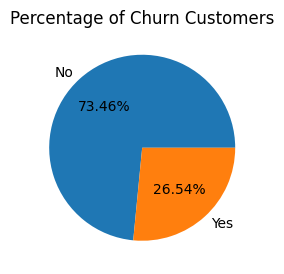

In [11]:
# DISPLAYIG THE PERCENTAGE OF CHURN CUSTOMERS
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.title("Percentage of Churn Customers")
plt.pie(gb["Churn"],labels=gb.index, autopct = "%1.2f%%")
plt.show()

<Axes: title={'center': 'Churn by Gender'}, xlabel='gender', ylabel='count'>

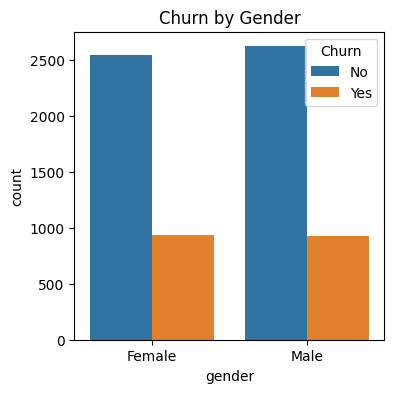

In [12]:
# THIS SHOWS THAT THE PERCENTAGE OF CHURN CUSTOMERS IS NOT BASED ON GENDER
plt.figure(figsize=(4,4))
plt.title("Churn by Gender")
sns.countplot(x = "gender", data = df, hue="Churn")

<Axes: title={'center': 'Churn by Senior Citizen'}, xlabel='SeniorCitizen', ylabel='count'>

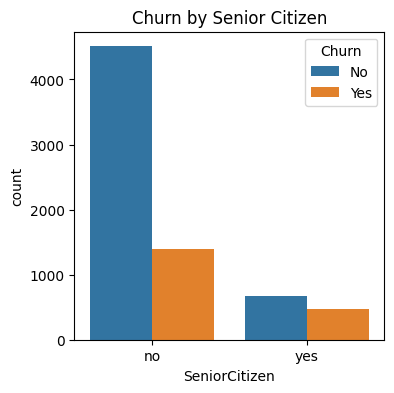

In [13]:
# COMPARISON FOR SENIOR CITIZENS CHURNING
plt.figure(figsize=(4,4))
plt.title("Churn by Senior Citizen")
sns.countplot(x = "SeniorCitizen", data = df, hue="Churn")

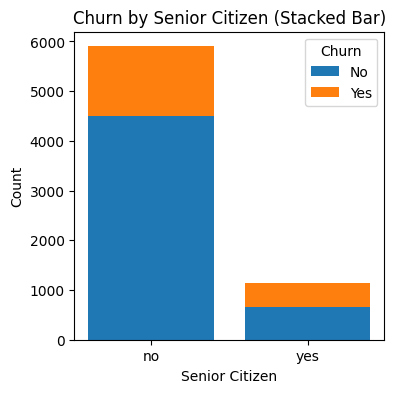

In [14]:
# COMPARATIVELY A GREATER PERCENTAGE OF SENIOR CITIZEN HAVE CHURNED OUT
stack_data = df.pivot_table(
    index="SeniorCitizen",
    columns="Churn",
    aggfunc="size",
)
plt.figure(figsize=(4,4))
plt.title("Churn by Senior Citizen (Stacked Bar)")
plt.bar(stack_data.index, stack_data["No"], label="No")
plt.bar(stack_data.index, stack_data["Yes"], bottom=stack_data["No"], label="Yes")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

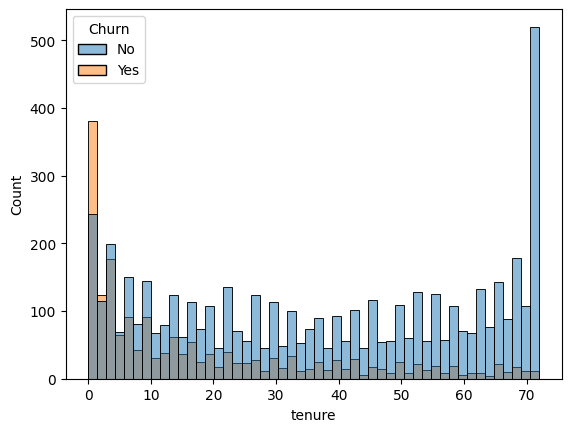

In [15]:
# CUSTOMERS WHO ARE USED FOR LONG TIME HAVE STAYED AND THE CUSTOMERS WHO HAVE USED FOR 1 TO 2 MONTHS HAVE CHURNED OUT
sns.histplot(x = "tenure",data = df,bins= 50, hue = "Churn")
plt.show()

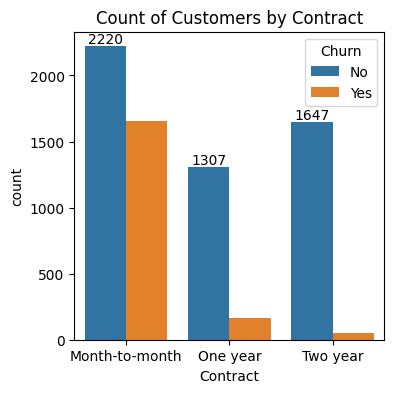

In [16]:
# DISPLAYIG THE COUNT OF CHURN CUSTOMERS BY CONTRACT 
# CUSTOMERS WHO HAVE MONTH TO MONTH CONTRACT ARE MORE LIKELY TO CHURN OUT WHEN COMPARED TO CUSTOMERS WHO HAVE 1 OR 2 YEAR OF CONTRACT
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [17]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

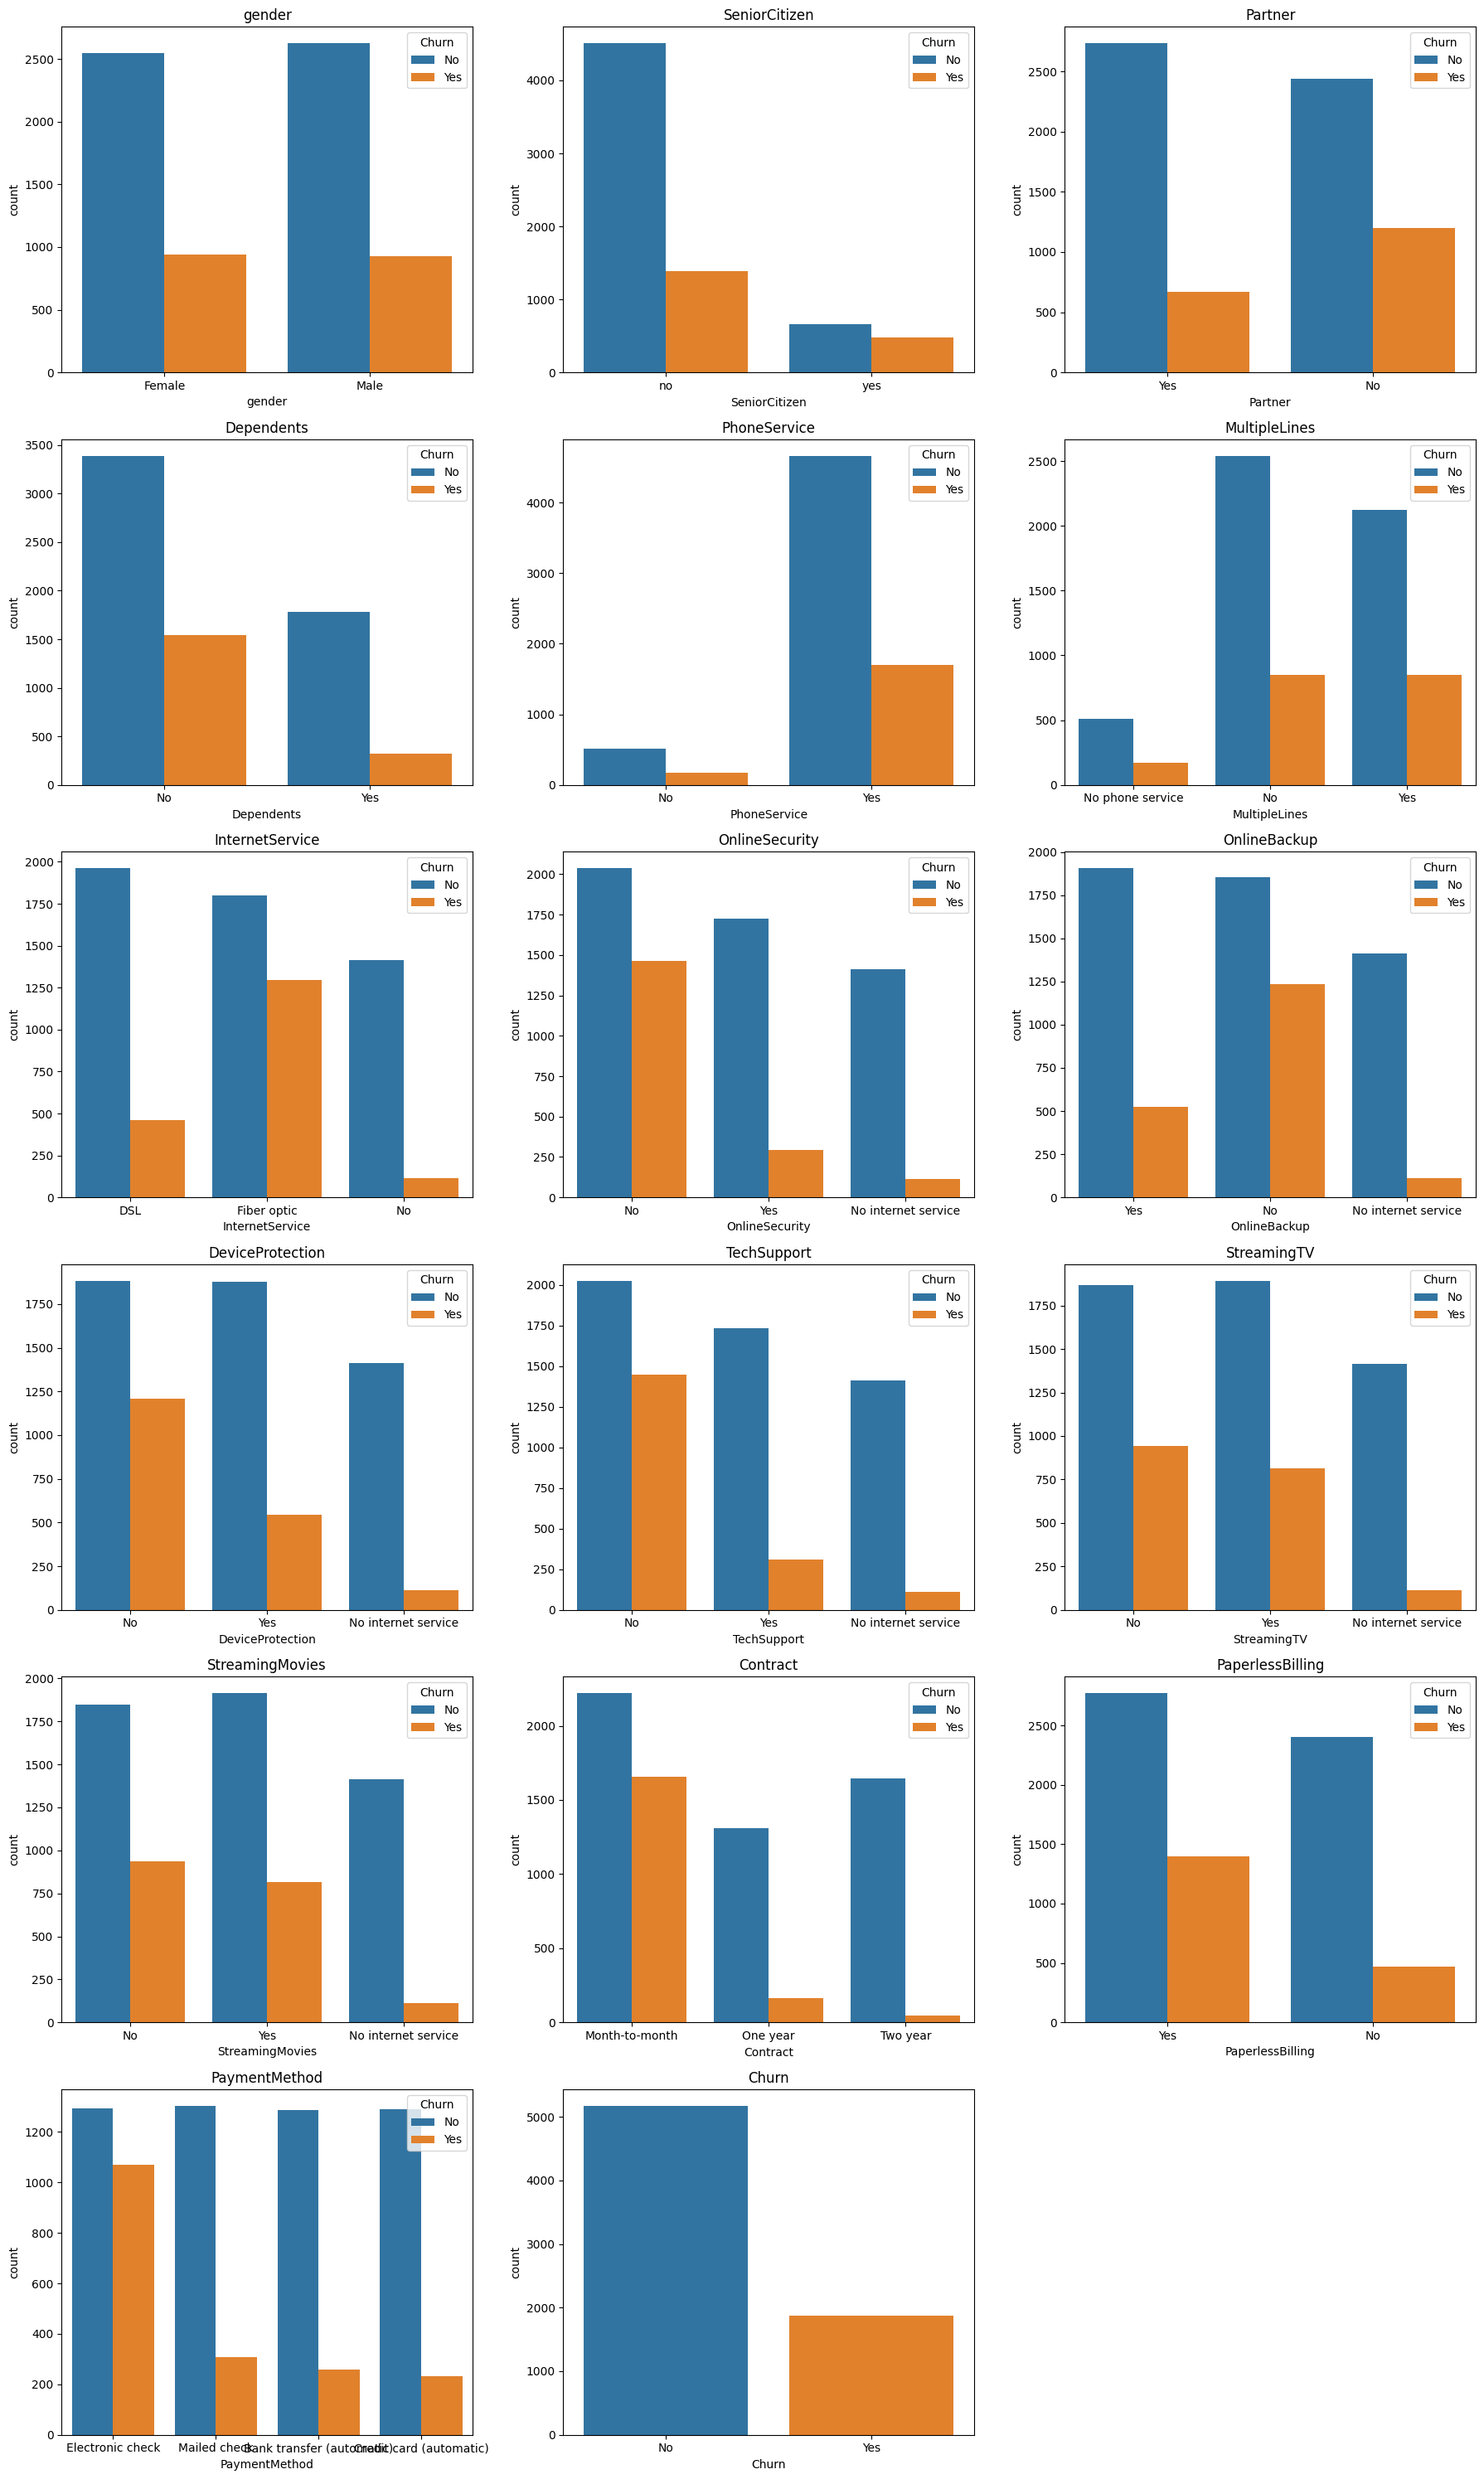

In [18]:
# THE MAJORITY OF CUSTOMERS WHO DO NOT CHURN TEND TO HAVE SERVICES LIKE PHONESERVICE,INTERNETSERVICE, AND ONLINE SECURITY ETC 
# AND THE CHURN RATES ARE HIGHER WHEN THE CUSTOMERS HAVE NOT USED THESE PARTICULAR SERVICES.
# COUNT PLOTS OF ALL THE CATEGORICAL COLUMNS
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(18, 30))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=col, data=df, hue="Churn")
    plt.title(col)
    
plt.tight_layout()
plt.show()

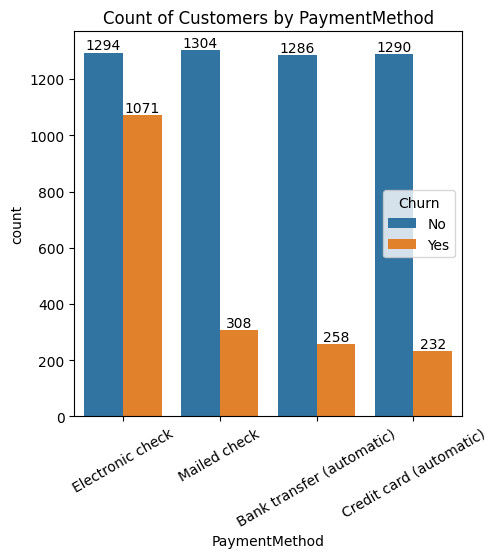

In [19]:
# THE CUSTOMER IS LIKELY TO CHURN OUT WHEN HE USES ELECTRONIC CHECK WHEN COMPARED TO OTHER PAYMENT MODES
plt.figure(figsize=(5,5))
ax = sns.countplot(x = "PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 30)
plt.title("Count of Customers by PaymentMethod")
plt.show()

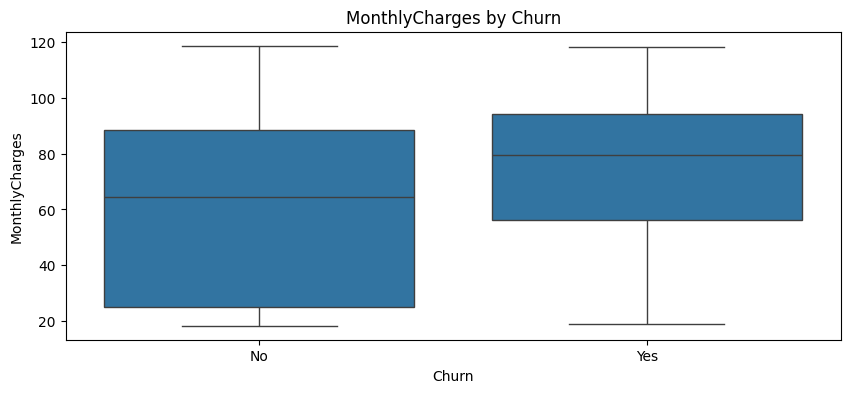

In [20]:
# Distribution and outlier analysis (charge levels correlate with churn and detect outliers that skew modeling)
plt.figure(figsize=(10,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges by Churn')
plt.show()

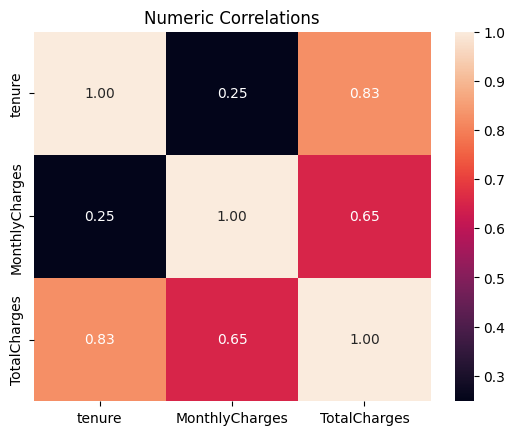

In [21]:
# Correlation heatmap reveals numeric relationships
num = df[['tenure','MonthlyCharges','TotalCharges']].apply(pd.to_numeric, errors='coerce')
sns.heatmap(num.corr(), annot=True, fmt='.2f')
plt.title('Numeric Correlations')
plt.show()

<Axes: >

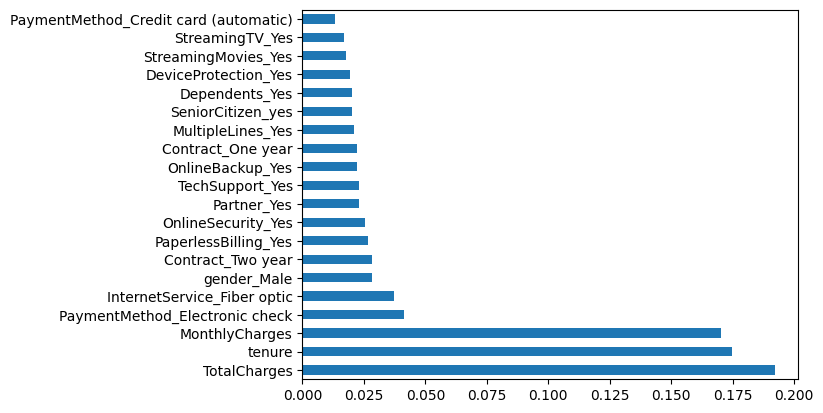

In [22]:
# Each bar represents how important a feature was for predicting whether a customer will churn.
# The longer the bar, the more influence that feature had on churn prediction.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['customerID','Churn'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = (df['Churn']=='Yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
importances.plot(kind='barh')


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC: 0.8276886512180629


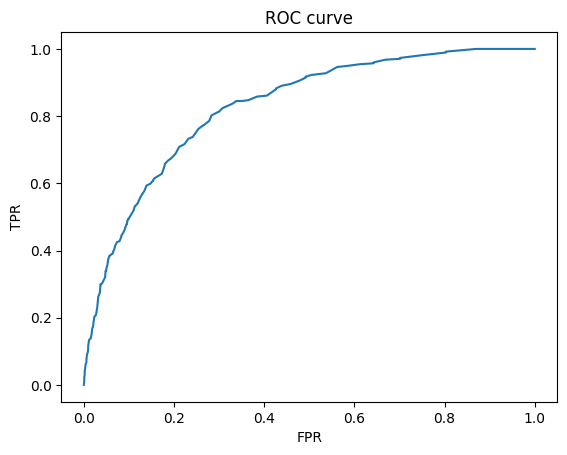

In [23]:
# ADDED  EVALUATION MATRIX BECAUSE ACCURACY ALONE CAN MISLEAD IF CLASSES ARE UNBALANCED
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC curve'); plt.show()
